In [53]:
# pip install yfinance
# pip install pandas-datareader
# pip install pykrx

In [54]:
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr
# import yfinance as yf
import matplotlib.pyplot as plt
from pykrx import stock


In [55]:
# !pip install pykrx

# pykrx API

In [56]:
df_ss = stock.get_market_ohlcv_by_date('20190101','20210101', '005930')
df_lg = stock.get_market_ohlcv_by_date('20190101','20210101', '066570')

In [57]:
df_ss.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2019-01-02,39400,39400,38550,38750,7847664
2019-01-03,38300,38550,37450,37600,12471493
2019-01-04,37450,37600,36850,37450,14108958
2019-01-07,38000,38900,37800,38750,12748997
2019-01-08,38000,39200,37950,38100,12756554


In [58]:
df_ss['전일종가'] = df_ss['종가'].shift(1)
df_ss['일별등락률'] =  ((df_ss['종가'] - df_ss['전일종가'] )/ df_ss['전일종가']) * 100

In [59]:
df_lg['전일종가'] = df_lg['종가'].shift(1)
df_lg['일별등락률'] =  ((df_lg['종가'] - df_lg['전일종가'] )/ df_lg['전일종가']) * 100

In [60]:
df_ss.head()

,시가,고가,저가,종가,거래량,전일종가,일별등락률
날짜,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,NaN,NaN
2019-01-03,38300,38550,37450,37600,12471493,38750.0,-2.967742
2019-01-04,37450,37600,36850,37450,14108958,37600.0,-0.398936
2019-01-07,38000,38900,37800,38750,12748997,37450.0,3.471295
2019-01-08,38000,39200,37950,38100,12756554,38750.0,-1.677419


In [61]:
type(df_ss)

pandas.core.frame.DataFrame

In [62]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2019-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      494 non-null    int32  
 1   고가      494 non-null    int32  
 2   저가      494 non-null    int32  
 3   종가      494 non-null    int32  
 4   거래량     494 non-null    int32  
 5   전일종가    493 non-null    float64
 6   일별등락률   493 non-null    float64
dtypes: float64(2), int32(5)
memory usage: 21.2 KB


In [63]:
df_lg.head()

,시가,고가,저가,종가,거래량,전일종가,일별등락률
날짜,,,,,,,
2019-01-02,63300,64200,62700,62800,568844,NaN,NaN
2019-01-03,63100,64100,62100,62900,604561,62800.0,0.159236
2019-01-04,63000,63400,61100,62200,602100,62900.0,-1.112878
2019-01-07,63100,64700,62700,64200,660173,62200.0,3.215434
2019-01-08,63700,63700,61200,61900,1338626,64200.0,-3.582555


In [64]:
# df_lg.fillna(0, inplce=True, axis=1)
# df_lg['일별등락률'].fillna(method='ffill', inplace=True)   #앞에서 가져온다
# df_lg['일별등락률'].fillna(method='bfill', inplace=True)   #뒤에서 가져온다
df_lg.fillna(method='ffill', inplace=True)   #앞에서 가져온다
df_lg.fillna(method='bfill', inplace=True)   #뒤에서 가져온다


In [65]:
df_ss.fillna(method='ffill', inplace=True)   #앞에서 가져온다
df_ss.fillna(method='bfill', inplace=True)   #뒤에서 가져온다

In [66]:
df_ss.isna().sum()

시가       0
고가       0
저가       0
종가       0
거래량      0
전일종가     0
일별등락률    0
dtype: int64

In [67]:
df_lg.isna().sum()

시가       0
고가       0
저가       0
종가       0
거래량      0
전일종가     0
일별등락률    0
dtype: int64

In [68]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2019-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      494 non-null    int32  
 1   고가      494 non-null    int32  
 2   저가      494 non-null    int32  
 3   종가      494 non-null    int32  
 4   거래량     494 non-null    int32  
 5   전일종가    494 non-null    float64
 6   일별등락률   494 non-null    float64
dtypes: float64(2), int32(5)
memory usage: 21.2 KB


In [69]:
df_ss['일별등락률'].cumsum()[:5]
# cumsum

날짜
2019-01-02   -2.967742
2019-01-03   -5.935484
2019-01-04   -6.334420
2019-01-07   -2.863125
2019-01-08   -4.540544
Name: 일별등락률, dtype: float64

c:\it\python_workspace\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\it\python_workspace\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


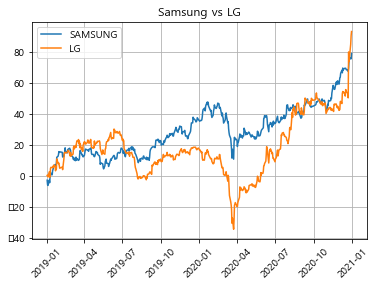

In [70]:
plt.plot(df_ss.index, df_ss['일별등락률'].cumsum(), label="SAMSUNG")
plt.plot(df_lg.index, df_lg['일별등락률'].cumsum(), label="LG") #,secondary_y=True)
plt.legend()
plt.xticks(rotation=45)
plt.title("Samsung vs LG")
plt.grid()
plt.show()

In [71]:
df_ss.shape

(494, 7)

In [72]:
window_size = 250   # 1년 단위로 묶는다
df_ss['종가'].rolling(window_size, min_periods=1).max()

날짜
2019-01-02    38750.0
2019-01-03    38750.0
2019-01-04    38750.0
2019-01-07    38750.0
2019-01-08    38750.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78700.0
2020-12-30    81000.0
Name: 종가, Length: 494, dtype: float64

In [73]:
temp = pd.DataFrame({"SS": df_ss['종가'], "LG": df_lg['종가']  })
temp.head()

,SS,LG
날짜,,
2019-01-02,38750,62800
2019-01-03,37600,62900
2019-01-04,37450,62200
2019-01-07,38750,64200
2019-01-08,38100,61900


In [74]:
temp.corr()

,SS,LG
SS,1.000000,0.595367
LG,0.595367,1.000000


Text(0, 0.5, 'LG')

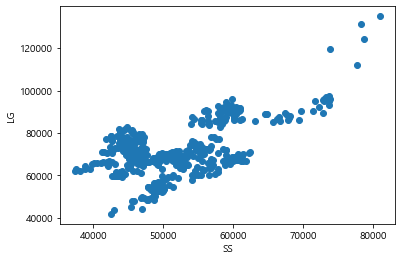

In [75]:
plt.scatter(temp['SS'], temp['LG'])
plt.xlabel("SS")
plt.ylabel("LG")

In [76]:
from scipy import stats
reg = stats.linregress(temp['SS'], temp['LG'])
print(type(reg))
print(reg)

<class 'scipy.stats._stats_mstats_common.LinregressResult'>
LinregressResult(slope=0.9480898106012626, intercept=22915.262833912013, rvalue=0.5953667255560411, pvalue=1.0476300600213361e-48, stderr=0.057682414451396484, intercept_stderr=3026.2527009378027)


In [77]:
# y = wx + b
x = 1
hx = reg.slope * x + reg.intercept

Text(0, 0.5, 'LG')

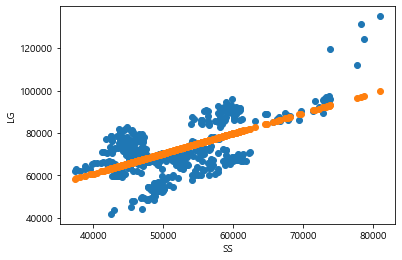

In [78]:
plt.scatter(temp['SS'], temp['LG'])
plt.scatter(temp['SS'],   reg.slope * temp['SS'] + reg.intercept)
plt.xlabel("SS")
plt.ylabel("LG")

# LSTM을 이용한 삼성전자 주가 예측

In [79]:
df = stock.get_market_ohlcv_by_date('20100101','20210101', '005930')
df.fillna(method='ffill', inplace=True)   #앞에서 가져온다
df.fillna(method='bfill', inplace=True)   #뒤에서 가져온다

In [80]:
df.shape  #(2714, 5)

(2714, 5)

In [81]:
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2714 entries, 2010-01-04 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   시가      2714 non-null   int32
 1   고가      2714 non-null   int32
 2   저가      2714 non-null   int32
 3   종가      2714 non-null   int32
 4   거래량     2714 non-null   int32
dtypes: int32(5)
memory usage: 74.2 KB


In [83]:
# #날짜모양의 글자다  '2019-01-01'  --> date타입
# df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')
# df.set_index('날짜')

<AxesSubplot:xlabel='날짜'>

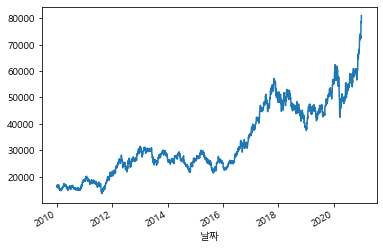

In [84]:
df["종가"].plot()

<AxesSubplot:xlabel='날짜'>

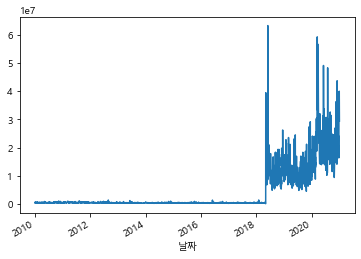

In [85]:
df["거래량"].plot()

<AxesSubplot:>

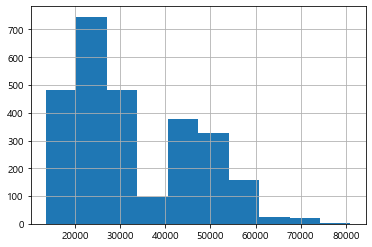

In [86]:
df['종가'].hist()

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df)
sdf = pd.DataFrame(df_scaler)
sdf.columns = df.columns
sdf.index = df.index

In [88]:
sdf.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2010-01-04,0.203291,0.199016,0.204604,0.038279,0.003769
2010-01-05,0.209114,0.203936,0.208440,0.042136,0.008808
2010-01-06,0.209873,0.206888,0.211253,0.047774,0.007241
2010-01-07,0.212911,0.206888,0.207928,0.039466,0.006981
2010-01-08,0.207595,0.201968,0.206138,0.041840,0.004659


In [89]:
print(sdf.shape[0],  int(sdf.shape[0] * 0.2))
split_idx =  int(sdf.shape[0] * 0.2)

2714 542


In [90]:
train = sdf.iloc[:-split_idx]
test = sdf.iloc[-split_idx:] 

In [91]:
print(train.shape, test.shape)

(2172, 5) (542, 5)


In [92]:
def mymake_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [113]:
y_train = train["종가"]
X_train = train.drop("종가", axis=1)
y_test = test["종가"]
X_test = test.drop("종가", axis=1)

X_train_arr, y_train_arr = mymake_dataset(X_train, y_train)
X_test_arr, y_test_arr = mymake_dataset(X_test, y_test)

In [114]:
print(X_train_arr.shape, y_train_arr.shape)
print(X_test_arr.shape, y_test_arr.shape)

(2152, 20, 4) (2152,)
(522, 20, 4) (522,)


In [104]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [105]:
model = Sequential()
# model.add(Input())
model.add(LSTM(20, activation='relu',return_sequences= True, input_shape = (X_train_arr.shape[1], X_train_arr.shape[2])))
model.add(Dense(1))


In [120]:

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
estop = EarlyStopping(monitor='val_loss', patience=4)
res = model.fit(X_train_arr, y_train_arr, epochs=100, batch_size=32,
          validation_split=0.1,
          callbacks=[estop])


Epoch 1/100
61/61 [==============================] - 3s 15ms/step - loss: 4.1535e-04 - mse: 4.1535e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2/100
61/61 [==============================] - 0s 5ms/step - loss: 3.9431e-04 - mse: 3.9431e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3/100
61/61 [==============================] - 0s 5ms/step - loss: 3.9180e-04 - mse: 3.9180e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4/100
61/61 [==============================] - 0s 5ms/step - loss: 3.9333e-04 - mse: 3.9333e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: 4.0021e-04 - mse: 4.0021e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/100
61/61 [==============================] - 0s 5ms/step - loss: 4.0218e-04 - mse: 4.0218e-04 - val_loss: 0.0038 - val_mse: 0.0038


(522, 20, 1)


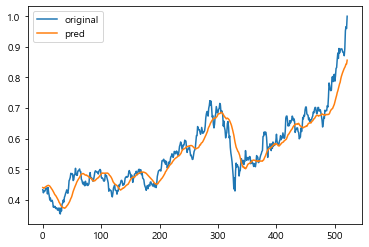

In [112]:

pred = model.predict(X_test_arr)   #522.20.1
# print(y_test_arr[:5], pred[:5])

print(pred.shape)
plt.plot(y_test_arr , label='original')  #522,
plt.plot(pred.mean(axis=1) , label='pred')  #522.20.1
plt.legend()
plt.show()

In [118]:
from keras.losses import MeanSquaredError
mse = MeanSquaredError()
mse(y_test_arr, pred).numpy()

0.02463076